**EDA Vehicles project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_clean = pd.read_csv('vehicles_clean.csv')
df_clean.drop(['Unnamed: 0',], axis =1, inplace = True)

In [4]:
df_clean.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,description,state,dlen,edad,millas_anuales,precio_por_milla
0,6995,2000.0,gmc,new sierra 1500,excellent,8.0,gas,167783.0,automatic,4wd,NoEspecificado,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,mn,3763,21.0,7989.666667,0.041691
1,8750,2013.0,hyundai,sonata,excellent,4.0,gas,90821.0,automatic,fwd,NoEspecificado,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,mn,154,8.0,11352.625000,0.096343
2,10900,2013.0,toyota,prius,good,4.0,hybrid,92800.0,automatic,fwd,NoEspecificado,2013 Prius V Model Two. One owner—must sell my...,ct,819,8.0,11600.000000,0.117457
3,16995,2007.0,gmc,sierra classic 2500hd,good,8.0,diesel,254217.0,automatic,4wd,truck,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,2925,14.0,18158.357143,0.066852
4,13995,2012.0,ford,f-150,good,6.0,gas,188406.0,automatic,4wd,truck,"**Bad Credit, No Credit... No Problem!**2012 F...",mn,3171,9.0,20934.000000,0.074281


In [5]:
df_num = df_clean[['price','year','odometer','edad','millas_anuales','dlen','cylinders']]
df_cat = df_clean[['manufacturer','model','fuel','transmission','drive','type','state','condition']]

In [7]:
df_clean.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'description',
       'state', 'dlen', 'edad', 'millas_anuales', 'precio_por_milla'],
      dtype='object')

In [10]:
df_clean[['price','year','odometer','edad','millas_anuales','dlen','cylinders']].corr()

,price,year,odometer,edad,millas_anuales,dlen,cylinders
price,1.000000,0.624247,-0.519022,-0.624247,0.001343,0.307217,0.251370
year,0.624247,1.000000,-0.625141,-1.000000,0.196052,0.300079,-0.155186
odometer,-0.519022,-0.625141,1.000000,0.625141,0.510759,-0.236606,0.138495
edad,-0.624247,-1.000000,0.625141,1.000000,-0.196052,-0.300079,0.155186
millas_anuales,0.001343,0.196052,0.510759,-0.196052,1.000000,-0.006815,0.038663
dlen,0.307217,0.300079,-0.236606,-0.300079,-0.006815,1.000000,-0.001125
cylinders,0.251370,-0.155186,0.138495,0.155186,0.038663,-0.001125,1.000000


<AxesSubplot:>

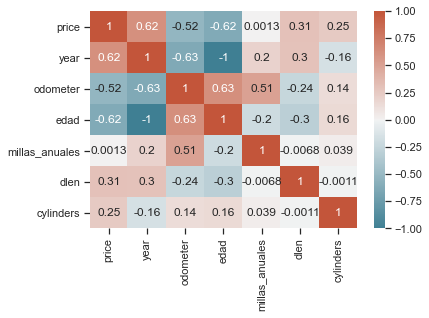

In [9]:
corr = df_num.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmax=1, vmin=-1, center=0, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [14]:
pd.pivot_table(df_clean, index = 'manufacturer', values = 'price')

,price
manufacturer,
acura,12488.414099
alfa-romeo,29693.000000
aston-martin,43748.777778
audi,17567.923540
bmw,16124.691871
buick,11587.971066
cadillac,17722.334802
chevrolet,16523.646464
chrysler,10436.687779


<AxesSubplot:>

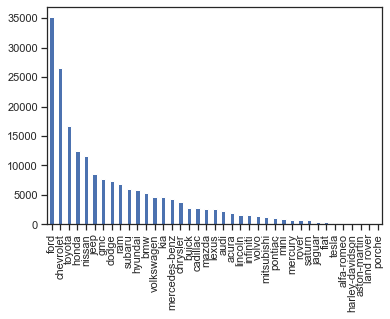

In [15]:
df_clean.manufacturer.value_counts().plot(kind='bar')

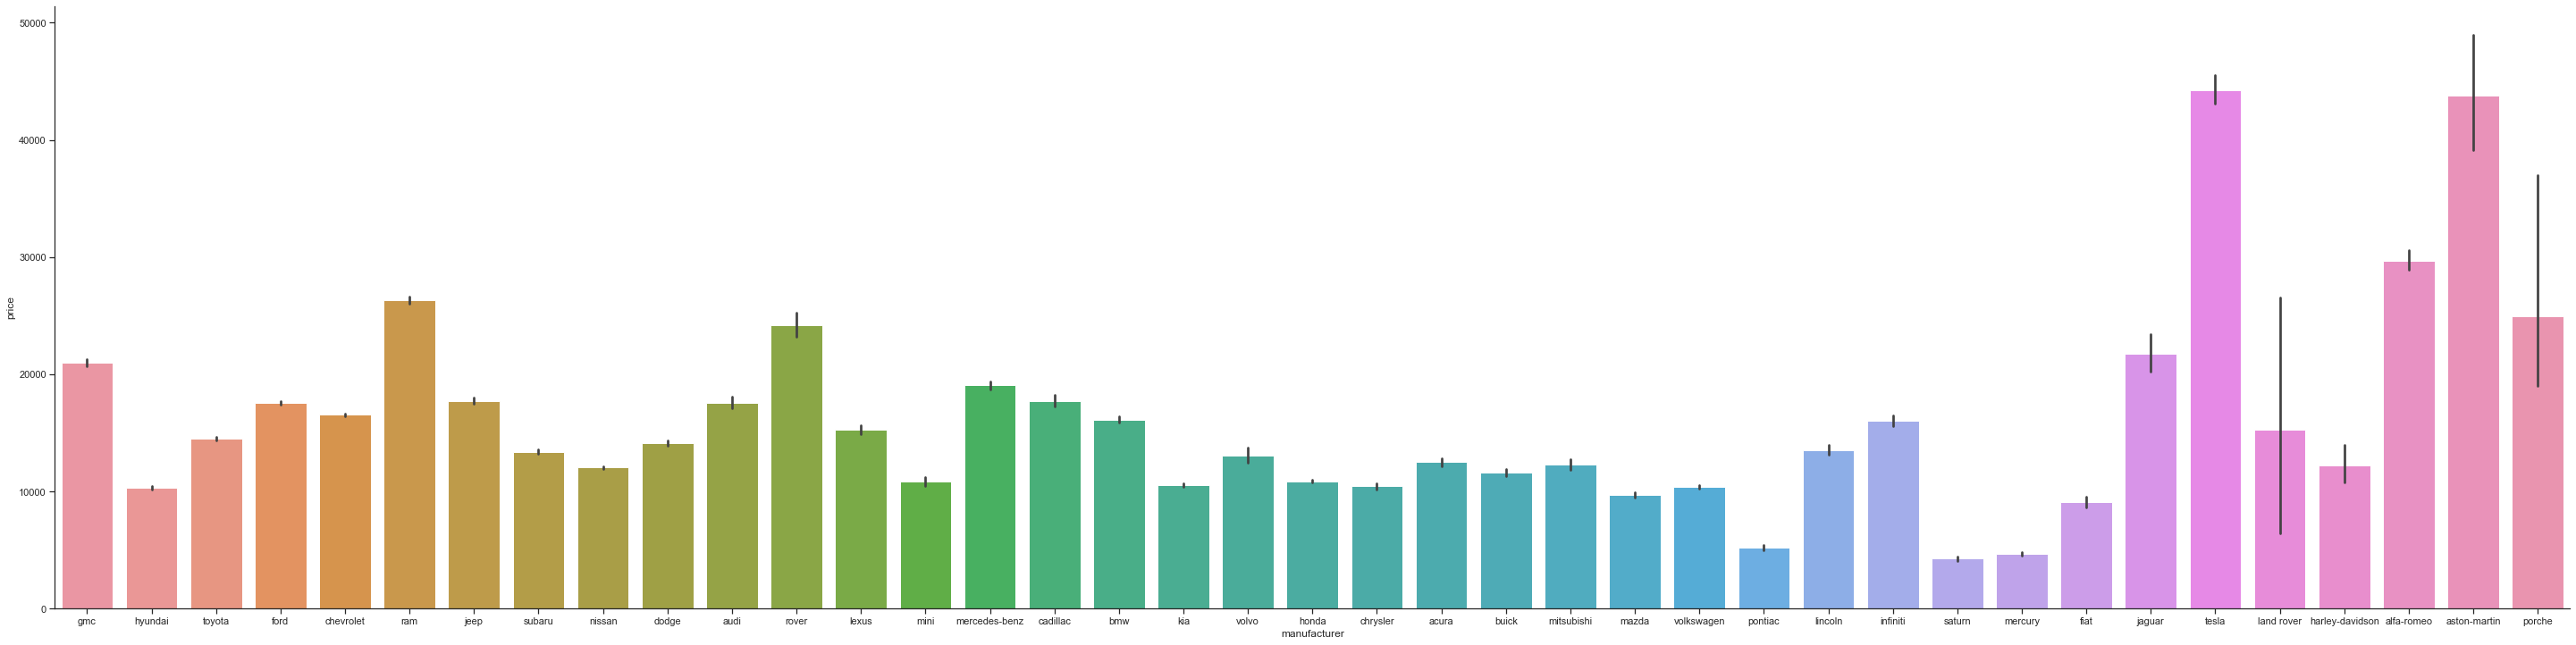

In [25]:
sns.catplot(x='manufacturer', y='price', kind="bar", data=df_clean, aspect = 4, height = 10)

In [36]:
pd.pivot_table(df_clean, index = 'fuel', values = 'price')

,price
fuel,
diesel,26172.142907
electric,22894.992095
gas,14670.902826
hybrid,11744.839140


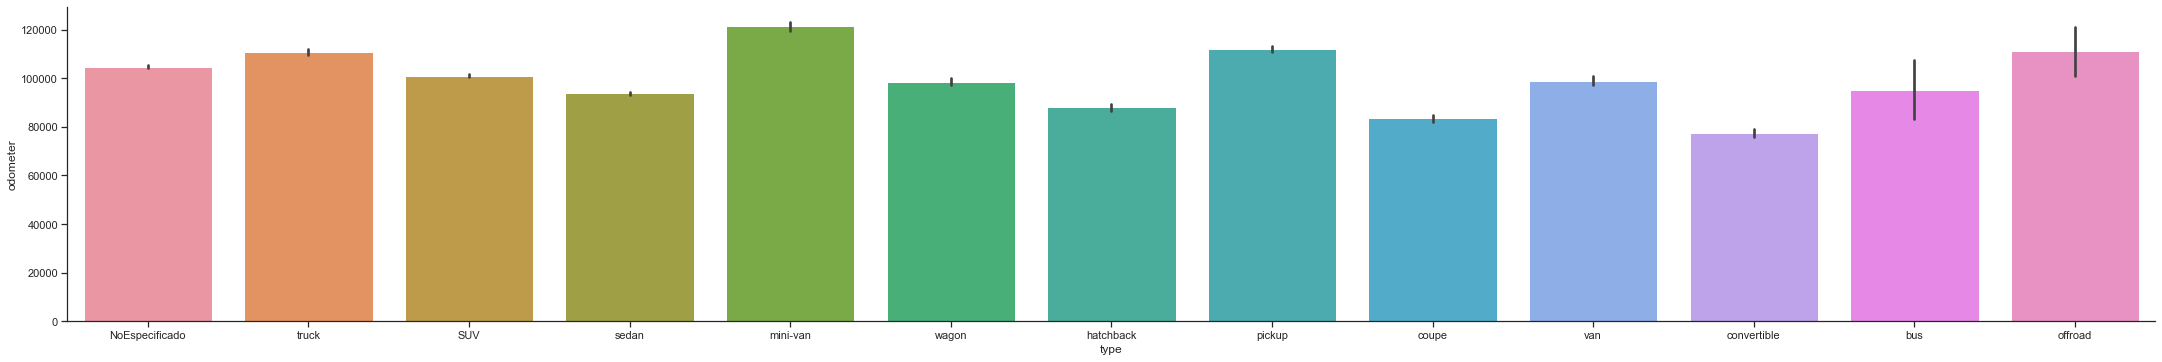

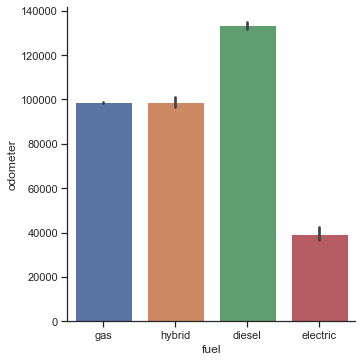

In [26]:
sns.catplot(x="type", y="odometer", kind="bar", data=df_clean, aspect= 6)
sns.catplot(x="fuel", y="odometer", kind="bar", data=df_clean)

In [35]:
pd.pivot_table(df_clean, index = 'transmission', values = 'price')

,price
transmission,
automatic,15446.918050
manual,13331.476804


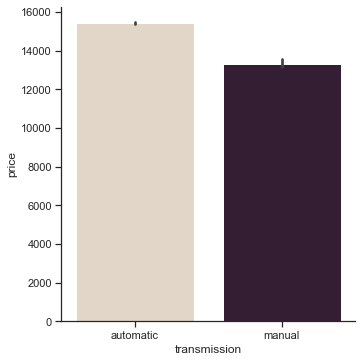

In [28]:
sns.catplot(x='transmission', y='price', kind="bar", data=df_clean, palette="ch:.25")    

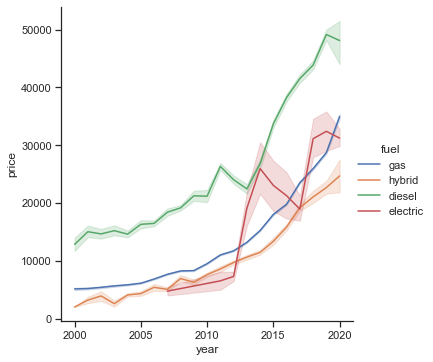

In [29]:
sns.relplot(x='year', y="price", hue="fuel", kind="line", data=df_clean)

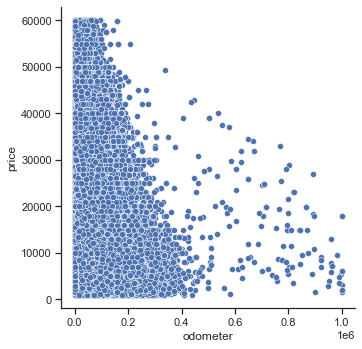

In [30]:
sns.relplot(x="odometer", y="price", data=df_clean)

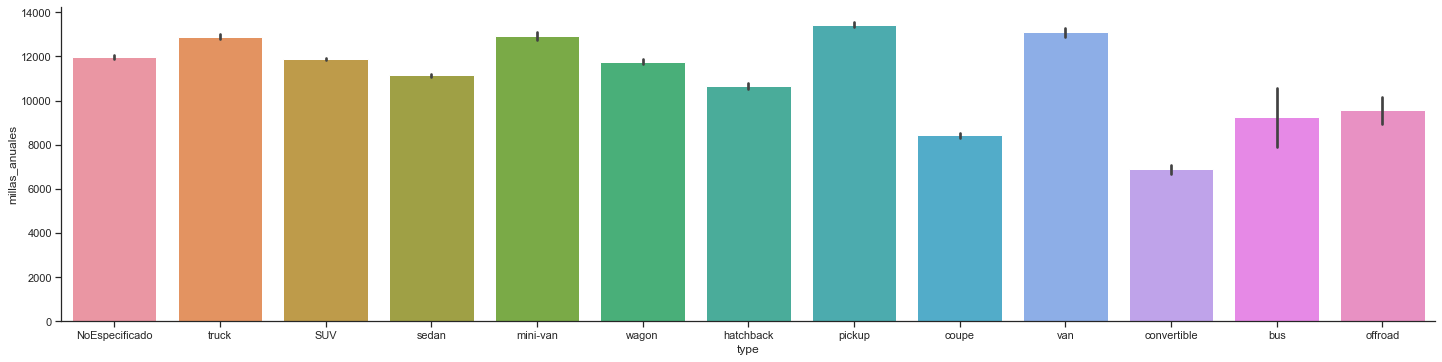

In [31]:
sns.catplot(x="type", y="millas_anuales", kind="bar", data=df_clean, aspect = 4)

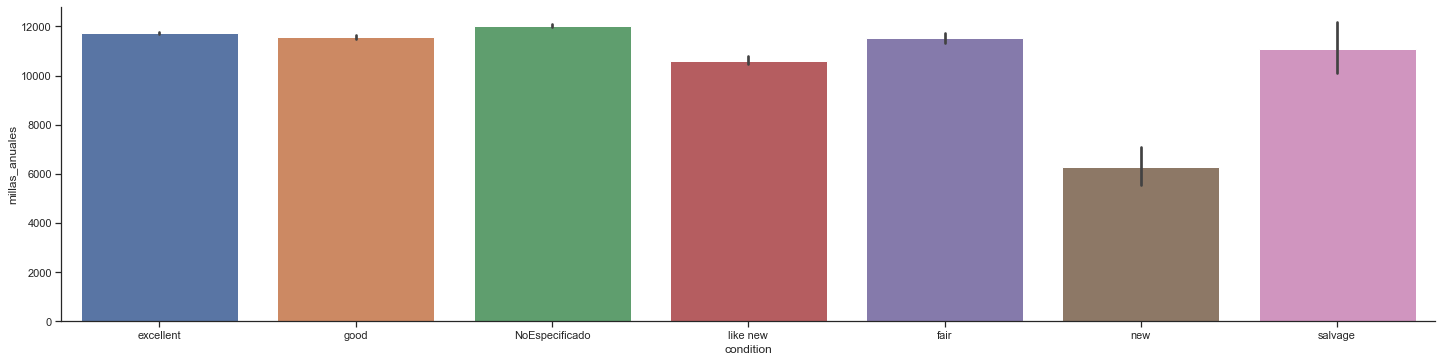

In [33]:
sns.catplot(x="condition", y="millas_anuales", kind="bar", data=df_clean, aspect = 4)

<AxesSubplot:>

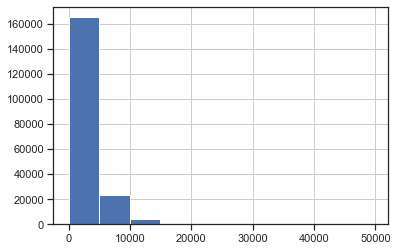

In [34]:
df_clean.dlen.hist()